In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis.distances import self_distance_array
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist  # Import squareform from scipy
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColorBar, LinearColorMapper
from bokeh.io import output_notebook
from bokeh.transform import linear_cmap
from bokeh.models.tickers import BasicTicker
from bokeh.models.formatters import PrintfTickFormatter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calculate_cb_distance_matrix(topology_file):
    """
    Calculates a distance matrix based on the Cβ atoms from an MD trajectory.
    """
    # Load the MD trajectory
    u = mda.Universe(topology_file)

    # Select Cβ atoms (excluding Glycine)
    cb_selection = u.select_atoms("name CB and not resname GLY")
    
    # # If you want to include Cα for Glycine
    # ca_selection = u.select_atoms("name CA and resname GLY")
    
    # Combine Cβ and Cα for Glycine
    all_cb_atoms = cb_selection 

    # Initialize an empty distance matrix
    num_atoms = len(all_cb_atoms)
    distance_matrix = np.zeros((num_atoms, num_atoms))

    # Loop through each frame in the trajectory to calculate distances
    for ts in u.trajectory:
        # Get current positions of Cβ atoms
        cb_positions = all_cb_atoms.positions
        
        # Calculate pairwise distances
        for i in range(num_atoms):
            for j in range(num_atoms):
                distance_matrix[i, j] += np.linalg.norm(cb_positions[i] - cb_positions[j])
    
    # Average over all frames
    distance_matrix /= len(u.trajectory)
    
    return distance_matrix

In [3]:


# Assuming we have two matrices of different shapes and we want to perform element-wise subtraction
import numpy as np

def subtract_overlapping_regions(matrix1, matrix2):
    """
    Performs element-wise subtraction of overlapping regions between two matrices.
    If the matrices are of different shapes, only the overlapping region is subtracted.
    """
    # Determine the shape of the overlapping region
    min_rows = min(matrix1.shape[0], matrix2.shape[0]) 
    print ("min_rows:", min_rows)
    min_cols = min(matrix1.shape[1], matrix2.shape[1])
    print ("min_cols:",min_cols)
    
    # Perform element-wise subtraction on the overlapping region
    result = matrix1[:min_rows, :min_cols] - matrix2[:min_rows, :min_cols]
    
    return result

In [4]:
topology_file="hHCN1_apo_segA.pdb"
cb_distance_matrixA = calculate_cb_distance_matrix(topology_file)

/home/alexhernandez/miniconda3/envs/test/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


In [5]:
## checking purpose
print (np.shape(cb_distance_matrixA))

(459, 459)


In [6]:
topology_fileB="hHCN1_cAMP_segA.pdb"
cb_distance_matrixB=calculate_cb_distance_matrix(topology_fileB)

In [7]:
# Example matrices (replace these with actual matrices from the notebook code)
matrix1 = cb_distance_matrixA
matrix2 = cb_distance_matrixB

# Apply the element-wise subtraction function to the matrices
result = np.abs(subtract_overlapping_regions(matrix1, matrix2))

result


min_rows: 459
min_cols: 459


array([[0.        , 0.0177021 , 0.43671846, ..., 1.10874176, 0.74645996,
        3.11520386],
       [0.0177021 , 0.        , 0.09754562, ..., 0.24900055, 0.58597565,
        4.50479889],
       [0.43671846, 0.09754562, 0.        , ..., 0.07227325, 0.53853607,
        4.44100189],
       ...,
       [1.10874176, 0.24900055, 0.07227325, ..., 0.        , 0.51974249,
        0.97734928],
       [0.74645996, 0.58597565, 0.53853607, ..., 0.51974249, 0.        ,
        0.59470081],
       [3.11520386, 4.50479889, 4.44100189, ..., 0.97734928, 0.59470081,
        0.        ]])

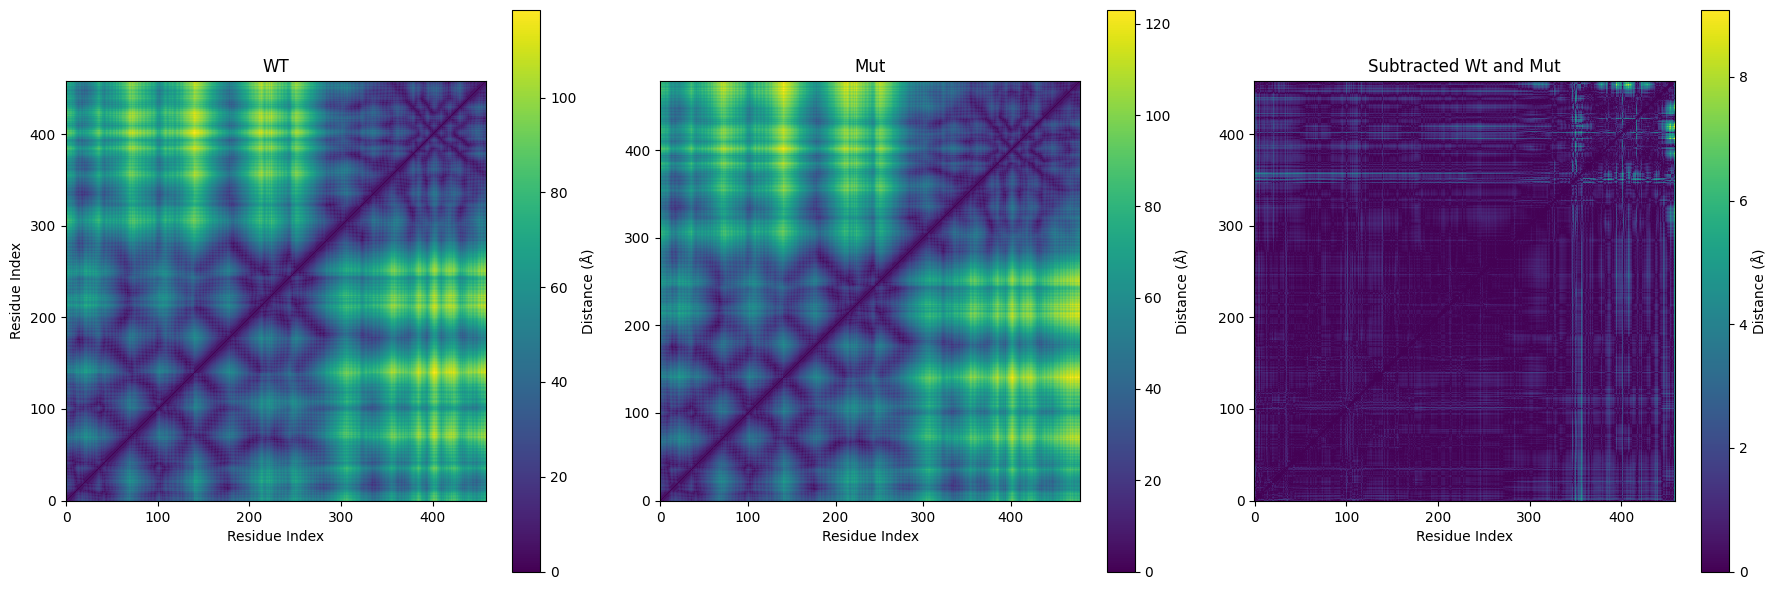

In [8]:
# Assuming matrix1, matrix2, and result are your data matrices

# Create a figure with three subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Adjust figsize for a better layout

# Plot matrix1
cax1 = axs[0].imshow(matrix1, cmap="viridis", interpolation="nearest")
fig.colorbar(cax1, ax=axs[0], label="Distance (Å)")
axs[0].set_title("WT")
axs[0].set_xlabel("Residue Index")
axs[0].set_ylabel("Residue Index")
axs[0].invert_yaxis()  # Invert y-axis as before

# Plot matrix2
cax2 = axs[1].imshow(matrix2, cmap="viridis", interpolation="nearest")
fig.colorbar(cax2, ax=axs[1], label="Distance (Å)")
axs[1].set_title("Mut")
axs[1].set_xlabel("Residue Index")
axs[1].invert_yaxis()  # Invert y-axis as before

# Plot the thresholded matrix (result)
cax3 = axs[2].imshow(result, cmap="viridis", interpolation="nearest")
fig.colorbar(cax3, ax=axs[2], label="Distance (Å)")
axs[2].set_title("Subtracted Wt and Mut")
axs[2].set_xlabel("Residue Index")
axs[2].invert_yaxis()  # Invert y-axis as before

# Adjust layout for better spacing between plots
plt.tight_layout()

# Display the figure
plt.show()


number residue: 459


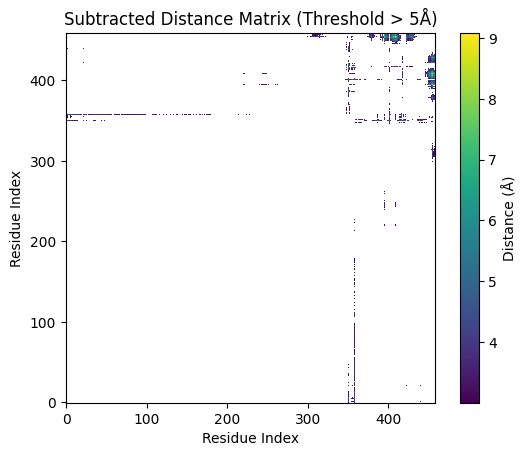

In [9]:
# Assuming 'sub' is your subtracted matrix
threshold = 3

# Set all values below or equal to 5 to NaN (or 0 if you prefer)
sub_thresholded = np.where(result > threshold, result, np.nan)  # Use np.nan for better visual distinction in the heatmap

num_residues = result.shape[0]
print ("number residue:",num_residues)
# Plot the thresholded matrix
plt.imshow(sub_thresholded, cmap="viridis", interpolation="nearest")
plt.colorbar(label="Distance (Å)")
plt.title("Subtracted Distance Matrix (Threshold > 5Å)")
plt.xlabel("Residue Index")
plt.ylabel("Residue Index")
# Invert y-axis as before
plt.gca().invert_yaxis()
plt.show()